In [304]:
%tensorflow_version 2.x 
%pylab inline
from tensorflow import keras

(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255
# define phi and sensed y here... 
# To initiate i use a random sampling matrix.


from tensorflow import keras
import numpy as np
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255
# define phi and sensed y here... 
# To initiate i use a random sampling matrix.
x_train[0].flatten().shape
Phi=np.random.binomial(1,0.6,[784,])
Phi=np.diag(np.transpose(Phi))
Phi.shape
x_train.shape
y=np.zeros([60000,784])
for i in range(60000):
  y[i,:]=np.matmul(Phi,x_train[i].flatten())

Phi=np.random.binomial(1,0.8,[784,])
Phi=np.diag(np.transpose(Phi))
Phi.shape
x_train.shape
y_t=np.zeros([10000,784])
for i in range(10000):
  y_t[i,:]=np.matmul(Phi,x_test[i].flatten()) 
  
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
])
decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
stacked_autoencoder = keras.models.Sequential([encoder, decoder])
stacked_autoencoder.compile(loss="binary_crossentropy",
                   optimizer='adam')
history = stacked_autoencoder.fit(x_train, x_train, epochs=40)




# x_train[0].flatten().shape
# Phi=np.random.binomial(1,0.8,[784,])
# Phi=np.diag(np.transpose(Phi))
# Phi.shape
# x_train.shape
# y=np.zeros([60000,784])
# for i in range(60000):
#   y[i,:]=np.matmul(Phi,x_train[i].flatten())
#   encoder = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(30, activation="relu"),
# ])
#   decoder = keras.models.Sequential([
#     keras.layers.Dense(100, activation="relu", input_shape=[30]),
#     keras.layers.Dense(28 * 28, activation="sigmoid"),
#     keras.layers.Reshape([28, 28])
# ])
# stacked_autoencoder = keras.models.Sequential([encoder, decoder])
# stacked_autoencoder.compile(loss="binary_crossentropy",
#                    optimizer='adam')
# #define the new loss here
# history = stacked_autoencoder.fit(x_train, x_train, epochs=10)
# #validation_data=[x_test, x_test]

Populating the interactive namespace from numpy and matplotlib
Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1440
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1054
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0997
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0968
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0949
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0935
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0924
Epoch 8/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0915
Epoch 9/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0908
Epoch 10/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0901
Epoch 11/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0896
Epoch 12/40
1875/1875 

In [320]:
import tensorflow as tf
Z=encoder.predict(x_train) 

# Define custom loss


import keras.backend as K
def fro_norm(w):
    return K.sqrt(K.sum(K.square(K.abs(w))))
def cust_reg(w):
    w2=K.dot(w,K.constant(Phi))
    #w2=w
    m = 0.0005*(K.dot(K.transpose(w2), w2) - np.eye(784))
    return K.sqrt(K.sum(K.square(K.abs(m))))
def cust_reg3(w):
    m = 0.0005*(K.dot(K.transpose(w), w) - np.eye(100))
    return K.sqrt(K.sum(K.square(K.abs(m))))
def my_init(shape, dtype=None):
#     m = w - K.constant(Phi)
      return K.constant(Phi)    
    # Create a loss function that adds the MSE loss to the mean of all squared activations of a specific layer
decoder1t = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=[30], kernel_regularizer=cust_reg3),
    keras.layers.Dense(28 * 28, activation="sigmoid", kernel_regularizer=cust_reg),
    keras.layers.Dense(784,kernel_initializer=my_init,trainable=False),
    #keras.layers.Reshape([28, 28])
])
decodert2 = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Dense(784,kernel_initializer=my_init,trainable=False),
    #keras.layers.Reshape([28, 28])
])

# decoder1t.compile(loss="MeanSquaredError",optimizer='adam',metrics=['accuracy'])
# decoder1t.fit(Z,y,epochs=5) 
# decodert2.compile(loss="MeanSquaredError",optimizer='adam', metrics=['accuracy'])
# decodert2.fit(Z,y,epochs=5) 

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0232 - accuracy: 0.0177
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0190 - accuracy: 0.0191
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0183 - accuracy: 0.0193
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0178 - accuracy: 0.0203
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0174 - accuracy: 0.0206
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0172 - accuracy: 0.0212
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0170 - accuracy: 0.0211
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0169 - accuracy: 0.0212
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0168 - accuracy: 0.0214
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.016

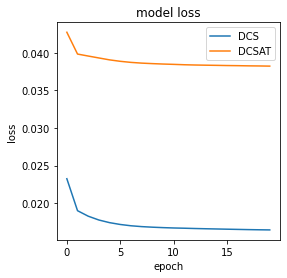

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()


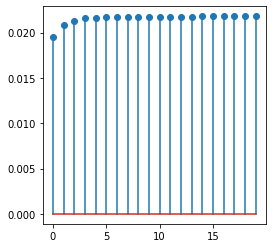

In [321]:

decodert2.compile(loss="MeanSquaredError",optimizer='adam',metrics=['accuracy'])
history=decodert2.fit(Z,y,epochs=20) 
decoder1t.compile(loss="MeanSquaredError",optimizer='adam',metrics=['accuracy'])
history2=decoder1t.fit(Z,y,epochs=20) 
from matplotlib import pyplot as plt
plt.figure(figsize=(4,4))
plt.plot(history.history['loss'])
plt.plot(history2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['DCS', 'DCSAT'], loc='upper right')
plt.show()
plt.figure(figsize=(4,4))
plt.stem(np.asarray(history2.history['loss'])-np.asarray(history.history['loss']))
plt.show()

In [322]:
Z=encoder.predict(x_test) 
Err1=0
Err2=0
for i in range(1000):
  print(i)
  ii=np.random.randint(10000)
  err2=0
  err3=0
  #print(i)
  err=np.zeros([1,1])
  errr=np.zeros([1,1])
  R=np.zeros([1,30])
  R=Z[ii]
  for j in range(1):
    n=np.random.normal(0,1,30)
    R2=np.zeros([1,30])
    #R2[0]=R+n
    R2[0]=R
    err[j]=np.linalg.norm(y_t[ii]-np.matmul(decoder1t(R2),Phi))
    errr[j]=np.linalg.norm(y_t[ii]-np.matmul(decodert2(R2),Phi))
  err2=np.max(err)
  err3=np.max(errr)
  Err1=Err1+err2
  Err2=Err2+err3
print(Err1/1000,Err2/1000)
(Err2-Err1)/1000

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

-0.20225640721840502

In [7]:
import keras
import tensorflow as tf
from keras.models import load_model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
import os
import pickle
import numpy as np

In [8]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [9]:
x_train.shape

(50000, 32, 32, 3)

In [10]:

# normalize data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [11]:
# divide x_test into validation and test
x_val = x_test[:7000]
x_test = x_test[7000:]

In [12]:
def cust_reg2(w):
  flattened_w=K.reshape(w,[-1,w.shape[-1]])
  m = 0.001*(K.dot(K.transpose(flattened_w), flattened_w) - K.constant(np.eye(w.shape[-1])))
  return K.sqrt(K.sum(K.square(K.abs(m))))
def my_init(shape, dtype=None):
#     m = w - K.constant(Phi)
      return K.constant(Phi)   

In [13]:
input_img = Input(shape=(32, 32, 3))
x = Conv2D(64, (3, 3), padding='same')(input_img)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

model2=Model(input_img, encoded)


x = Conv2D(16, (3, 3), padding='same')(encoded)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), padding='same')(x)
#,kernel_regularizer=cust_reg2)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(3, (3, 3), padding='same')(x)
#,kernel_regularizer=cust_reg2)(x)
x = BatchNormalization()(x)
decoded = Activation('sigmoid')(x)




In [14]:

# define phi and sensed y here... 
# To initiate i use a random sampling matrix.

Phi=np.random.binomial(1,0.8,x_train[0].flatten().shape)
Phi=np.diag(np.transpose(Phi))

y=np.zeros([5000,3072])
for i in range(5000):
  print(i)
  y[i,:]=np.matmul(Phi,x_train[i].flatten())
y_t=np.zeros([3000,3072])
for i in range(3000):
  y_t[i,:]=np.matmul(Phi,x_test[i].flatten()) 
  

Streaming output truncated to the last 5000 lines.
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
2

In [15]:
model = Model(input_img, decoded)
model.compile(optimizer='adam', loss='binary_crossentropy')

In [16]:
history = model.fit(x_train, x_train,
                    batch_size=64,
                    epochs=100,
                    verbose=1,
                    shuffle=True)

Epoch 1/100
782/782 [==============================] - 14s 17ms/step - loss: 0.5853
Epoch 2/100
782/782 [==============================] - 13s 17ms/step - loss: 0.5739
Epoch 3/100
782/782 [==============================] - 13s 17ms/step - loss: 0.5705
Epoch 4/100
782/782 [==============================] - 13s 17ms/step - loss: 0.5688
Epoch 5/100
782/782 [==============================] - 13s 17ms/step - loss: 0.5676
Epoch 6/100
782/782 [==============================] - 13s 17ms/step - loss: 0.5668
Epoch 7/100
782/782 [==============================] - 13s 17ms/step - loss: 0.5663
Epoch 8/100
782/782 [==============================] - 13s 17ms/step - loss: 0.5658
Epoch 9/100
782/782 [==============================] - 13s 17ms/step - loss: 0.5654
Epoch 10/100
782/782 [==============================] - 13s 17ms/step - loss: 0.5651
Epoch 11/100
782/782 [==============================] - 13s 17ms/step - loss: 0.5648
Epoch 12/100
782/782 [==============================] - 13s 17ms/step - lo

In [17]:
Z=np.zeros([x_train.shape[0],4,4,16])
for i in range(x_train.shape[0]):
  print(i)
  xf=np.zeros([1,32,32,3])
  xf[0,:,:,:]=x_train[i]
  Z[i]=model2(xf)

Streaming output truncated to the last 5000 lines.
45001
45002
45003
45004
45005
45006
45007
45008
45009
45010
45011
45012
45013
45014
45015
45016
45017
45018
45019
45020
45021
45022
45023
45024
45025
45026
45027
45028
45029
45030
45031
45032
45033
45034
45035
45036
45037
45038
45039
45040
45041
45042
45043
45044
45045
45046
45047
45048
45049
45050
45051
45052
45053
45054
45055
45056
45057
45058
45059
45060
45061
45062
45063
45064
45065
45066
45067
45068
45069
45070
45071
45072
45073
45074
45075
45076
45077
45078
45079
45080
45081
45082
45083
45084
45085
45086
45087
45088
45089
45090
45091
45092
45093
45094
45095
45096
45097
45098
45099
45100
45101
45102
45103
45104
45105
45106
45107
45108
45109
45110
45111
45112
45113
45114
45115
45116
45117
45118
45119
45120
45121
45122
45123
45124
45125
45126
45127
45128
45129
45130
45131
45132
45133
45134
45135
45136
45137
45138
45139
45140
45141
45142
45143
45144
45145
45146
45147
45148
45149
45150
45151
45152
45153
45154
45155
45156
45157
45158
4

Epoch 1/60
782/782 [==============================] - 9s 12ms/step - loss: 0.5879
Epoch 2/60
782/782 [==============================] - 9s 11ms/step - loss: 0.5744
Epoch 3/60
782/782 [==============================] - 9s 11ms/step - loss: 0.5711
Epoch 4/60
782/782 [==============================] - 9s 11ms/step - loss: 0.5695
Epoch 5/60
782/782 [==============================] - 9s 11ms/step - loss: 0.5685
Epoch 6/60
782/782 [==============================] - 9s 11ms/step - loss: 0.5680
Epoch 7/60
782/782 [==============================] - 9s 11ms/step - loss: 0.5673
Epoch 8/60
782/782 [==============================] - 9s 11ms/step - loss: 0.5671
Epoch 9/60
782/782 [==============================] - 9s 11ms/step - loss: 0.5668
Epoch 10/60
782/782 [==============================] - 9s 12ms/step - loss: 0.5665
Epoch 11/60
782/782 [==============================] - 9s 11ms/step - loss: 0.5662
Epoch 12/60
782/782 [==============================] - 9s 12ms/step - loss: 0.5660
Epoch 13/60
7

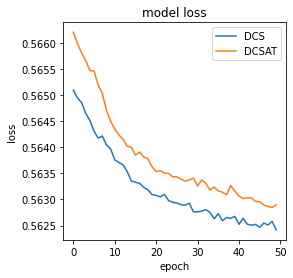

In [20]:
# input_z = Input(shape=(4, 4, 16))
# x = Conv2D(16, (3, 3), padding='same')(input_z)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
# x = UpSampling2D((2, 2))(x)
# x = Conv2D(32, (3, 3), padding='same')(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
# x = UpSampling2D((2, 2))(x)
# x = Conv2D(64, (3, 3), padding='same')(x)
# #,kernel_regularizer=cust_reg2)(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
# x = UpSampling2D((2, 2))(x)
# x = Conv2D(3, (3, 3), padding='same')(x)
# #,kernel_regularizer=cust_reg2)(x)
# x = BatchNormalization()(x)
# decoded = Activation('sigmoid')(x)
# model3=Model(input_z, decoded)
# model3.compile(optimizer='adam', loss='binary_crossentropy')
# history3=model3.fit(Z,x_train, batch_size=64,
#                     epochs=60,
#                     verbose=1,
#                     shuffle=True)


import keras.backend as K
input_z = Input(shape=(4, 4, 16))
x = Conv2D(16, (3, 3), padding='same')(input_z)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), padding='same',kernel_regularizer=cust_reg2)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), padding='same',kernel_regularizer=cust_reg2)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(3, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
decoded = Activation('sigmoid')(x)
model4=Model(input_z, decoded)
model4.compile(optimizer='adam', loss='binary_crossentropy')
history4=model4.fit(Z,x_train, batch_size=64,
                    epochs=60,
                    verbose=1,
                    shuffle=True)
from matplotlib import pyplot as plt
plt.figure(figsize=(4,4))
plt.plot(history3.history['loss'][10:])
plt.plot(history4.history['loss'][10:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['DCS', 'DCSAT'], loc='upper right')
plt.show()


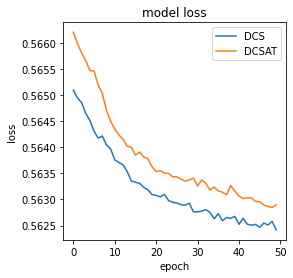

In [21]:
from matplotlib import pyplot as plt
plt.figure(figsize=(4,4))
plt.plot(history3.history['loss'][10:])
plt.plot(history4.history['loss'][10:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['DCS', 'DCSAT'], loc='upper right')
plt.show()

In [25]:
# ZZ=np.zeros([x_test.shape[0],4,4,16])
# for i in range(x_test.shape[0]):
#   print(i)
#   xf=np.zeros([1,32,32,3])
#   xf[0,:,:,:]=x_test[i]
#   ZZ[i]=model2(xf)
n=np.random.normal(0,1,[1,4,4,16])
Err1=0
Err2=0
R2=np.zeros_like(n)
R=np.zeros_like(n)
for i in range(20):
  ii=np.random.randint(3000)
  err1=0
  err2=0
  print(i)
  err=np.zeros([50,1])
  errr=np.zeros([50,1])
  R=ZZ[ii]
  for j in range(50):
    n=np.random.normal(0,1,[1,4,4,16])
    R2=R+n
    err[j]=np.linalg.norm(y_t[ii]-np.matmul(Phi,model3(R2).numpy().flatten()))
    errr[j]=np.linalg.norm(y_t[ii]-np.matmul(Phi,model4(R2).numpy().flatten()))
  err1=err1+np.max(err)
  err2=err2+np.max(errr)
  Err1=Err1+err1
  Err2=Err2+err2
print(Err1/20,Err2/20)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
19.872434173011204 19.993532449230873


In [270]:
i
print(Err1/150,Err2/150)

0.0022148771139320765 0.0024725373204666674


In [ ]:

def _l2normalize(v, eps=1e-12):
  return v / (K.sum(v ** 2) ** 0.5 + eps)
def power_iteration(W):
            #Accroding the paper, we only need to do power iteration one time.
  _u = randn([W.shape[1],1])
  for i in range(5):
    _v = _l2normalize(K.dot(_u, K.transpose(W)))
    _u = _l2normalize(K.dot(_v, W))
  return _u,_v
def spectral_norm(W):
  W_shape = W.shape
        #Flatten the Tensor
  W_reshaped = K.reshape(W, [-1, W_shape[-1]])
  _u,_v = power_iteration(W_reshaped)
      #Calculate Sigma
  sigma=K.dot(_v, W_reshaped)
  sigma=K.dot(sigma, K.transpose(_u))
        #normalize it
  W_bar = W_reshaped / sigma
        #reshape weight tensor
  return  K.reshape(W_bar, W_shape)